# Numpy

Материалы:
* Макрушин С.В. "Лекция 1: Библиотека Numpy"
* https://numpy.org/doc/stable/user/index.html
* https://numpy.org/doc/stable/reference/index.html

## Задачи для совместного разбора

1. Сгенерировать двухмерный массив `arr` размерности (4, 7), состоящий из случайных действительных чисел, равномерно распределенных в диапазоне от 0 до 20. Нормализовать значения массива с помощью преобразования вида  $𝑎𝑥+𝑏$  так, что после нормализации максимальный элемент масcива будет равен 1.0, минимальный 0.0

In [4]:
import numpy as np

In [6]:
np.random.randint(0, 20, size = (4, 7))


array([[ 4, 10, 12, 18,  3,  0, 12],
       [ 0,  8,  6,  4,  2,  1, 11],
       [ 8, 17,  1, 10, 17,  6,  8],
       [ 7,  1,  9, 11,  6, 16, 11]])

2. Создать матрицу 8 на 10 из случайных целых (используя модуль `numpy.random`) чисел из диапозона от 0 до 10 и найти в ней строку (ее индекс и вывести саму строку), в которой сумма значений минимальна.

In [7]:
np.random.randint(0, 10, size = (8, 10))

array([[3, 7, 9, 1, 9, 6, 9, 3, 2, 9],
       [7, 8, 9, 7, 8, 3, 1, 5, 3, 9],
       [1, 4, 2, 3, 9, 4, 1, 5, 4, 1],
       [1, 4, 7, 9, 4, 7, 6, 8, 7, 8],
       [0, 9, 4, 7, 8, 4, 5, 2, 4, 6],
       [6, 1, 2, 9, 6, 8, 1, 9, 0, 2],
       [5, 2, 4, 5, 9, 2, 1, 7, 5, 1],
       [9, 2, 8, 5, 1, 4, 7, 9, 6, 2]])

3. Найти евклидово расстояние между двумя одномерными векторами одинаковой размерности.

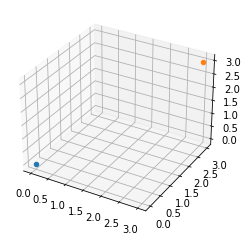

In [31]:
import matplotlib.pyplot as pl
from mpl_toolkits.mplot3d import Axes3D
fig = pl.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(0, 0, 0)
ax.scatter(3, 3, 3)
pl.show()

4. Решить матричное уравнение `A*X*B=-C` - найти матрицу `X`. Где `A = [[-1, 2, 4], [-3, 1, 2], [-3, 0, 1]]`, `B=[[3, -1], [2, 1]]`, `C=[[7, 21], [11, 8], [8, 4]]`.

## Лабораторная работа №1

Замечание: при решении данных задач не подразумевается использования циклов или генераторов Python, если в задании не сказано обратного. Решение должно опираться на использования функционала библиотеки `numpy`.

1. Файл `minutes_n_ingredients.csv` содержит информацию об идентификаторе рецепта, времени его выполнения в минутах и количестве необходимых ингредиентов. Считайте данные из этого файла в виде массива `numpy` типа `int32`, используя `np.loadtxt`. Выведите на экран первые 5 строк массива.

In [6]:
import numpy as np
data = np.loadtxt("minutes_n_ingredients.csv", delimiter=",", skiprows=1, dtype=np.int32, max_rows=5)
print(data)

[[127244     60     16]
 [ 23891     25      7]
 [ 94746     10      6]
 [ 67660      5      6]
 [157911     60     14]]


2. Вычислите среднее значение, минимум, максимум и медиану по каждому из столбцов, кроме первого.

In [27]:
print(np.mean(data, 0)[1:])
print(np.max(data, 0)[1:])
print(np.min(data, 0)[1:])
print(np.median(data, 0)[1:])


[32.   9.8]
[60 16]
[5 6]
[25.  7.]


3. Ограничьте сверху значения продолжительности выполнения рецепта значением квантиля $q_{0.75}$. 

In [32]:
import numpy as np
data = np.loadtxt("minutes_n_ingredients.csv", delimiter=",", skiprows=1, dtype=np.int32)
np.quantile(data[1:], 0.75)

100064.0

4. Посчитайте, для скольких рецептов указана продолжительность, равная нулю. Замените для таких строк значение в данном столбце на 1.

In [42]:
for i in range(len(data)):
    if data[i][1] == 0:
        data[i][1] = 1
data

array([[127244,     60,     16],
       [ 23891,     25,      7],
       [ 94746,     10,      6],
       ...,
       [498432,     65,     15],
       [370915,      5,      4],
       [ 81993,    140,     14]])

5. Посчитайте, сколько уникальных рецептов находится в датасете.

In [44]:
len(np.unique(data[:, 0]))

100497

6. Сколько и каких различных значений кол-ва ингредиентов присутвует в рецептах из датасета?

In [7]:
len(np.unique(data[:, 1]))

4

7. Создайте версию массива, содержащую информацию только о рецептах, состоящих не более чем из 5 ингредиентов.

In [11]:
f = []
for i in range(len(data)):
    if data[i, 2] <= 5:
        f.append(data[i])
print(f)

[]


8. Для каждого рецепта посчитайте, сколько в среднем ингредиентов приходится на одну минуту рецепта. Найдите максимальное значение этой величины для всего датасета

In [13]:
a = data[:, 2] / data[:, 1]
print(a)

[0.26666667 0.28       0.6        1.2        0.23333333]


9. Вычислите среднее количество ингредиентов для топ-100 рецептов с наибольшей продолжительностью

In [14]:
a = data[data[:, 1].argsort()[::1]][:100]
np.mean(a[:,2])

9.8

10. Выберите случайным образом и выведите информацию о 10 различных рецептах

In [24]:
import random
a = np.random.randint(0, 10000, size=(1,10))
print(data[a])

IndexError: index 6983 is out of bounds for axis 0 with size 5

11. Выведите процент рецептов, кол-во ингредиентов в которых меньше среднего.

In [21]:
means = data[:, 2] <= np.mean(data[:,2])
b = len(data[means, :]) / len(data)*100
print(b)

60.0


12. Назовем "простым" такой рецепт, длительность выполнения которого не больше 20 минут и кол-во ингредиентов в котором не больше 5. Создайте версию датасета с дополнительным столбцом, значениями которого являются 1, если рецепт простой, и 0 в противном случае.

In [22]:
data2 = data[:]
p = [1 if (row[1]  <= 20) & (row[2] <= 5) else 0 for row in data2]
n = np.insert(data2, 3, p, axis=1)
print(n)

[[127244     60     16      0]
 [ 23891     25      7      0]
 [ 94746     10      6      0]
 [ 67660      5      6      0]
 [157911     60     14      0]]


13. Выведите процент "простых" рецептов в датасете

In [ ]:
a = (n[:, 3] == 1)
len(data[a, :])/len(n) * 100

14. Разделим рецепты на группы по следующему правилу. Назовем рецепты короткими, если их продолжительность составляет менее 10 минут; стандартными, если их продолжительность составляет более 10, но менее 20 минут; и длинными, если их продолжительность составляет не менее 20 минут. Создайте трехмерный массив, где нулевая ось отвечает за номер группы (короткий, стандартный или длинный рецепт), первая ось - за сам рецепт и вторая ось - за характеристики рецепта. Выберите максимальное количество рецептов из каждой группы таким образом, чтобы было возможно сформировать трехмерный массив. Выведите форму полученного массива.

In [28]:
a = np.arange(48).reshape(4, 3, 4)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]

 [[24 25 26 27]
  [28 29 30 31]
  [32 33 34 35]]

 [[36 37 38 39]
  [40 41 42 43]
  [44 45 46 47]]]
